Sources:
- https://info.blaisepascal.fr/nsi-processus-et-ressources
- https://glassus.github.io/terminale_nsi/T5_Architecture_materielle/5.2_Gestion_des_processus/cours/

# Architecture matérielle - Activité

## 1. Architecture de von neumann (rappels)

Lire l'article wikipedia: https://fr.wikipedia.org/wiki/Architecture_de_von_Neumann et répondre aux questions suivantes:

1. Quels sont les 4 principaux éléments d'une architecture de von Neumann ?

1. Unité Arithmétique et logique
2. unité de contrôle
3. Mémoire divisé en mémoire volatile 
4. Dispositifs d'entrée/sortie 

2. Ou est le programme dans l'architecture de von neumann ?

Programme stocké dans sa mémoire

## 2. Processus/Programme

3. Quelle est la différence entre un programme et un processus ?

Programme = ensemble de code executé et enregistré 
Processus = code qui s'execute plusieurs fois 

4. Sur les ordinateurs du lycée, démarrer l'application `ubuntu`. Il s'agit d'une distribution GNU/Linux fonctionnant ici à l'intérieur de windows.<br>
*Si l'application de se lance pas, appeler l'enseignant*.<br>
***Le collage dans le terminal ubuntu se fait à l'aide d'un clic droit.***

5. Pour observer les processus, la commande UNIX (celles utilisables dans toutes les distributions GNU/Linux ou mac/OS) est `ps`. Taper  `man ps` dans le terminal ubuntu puis taper sur entrer. Que permet la commande `man` ?

la commande 'man' me donne accès au manuel de la commande cité juste après 

6. Taper `ps ax -l` pour observer tous les processus exécutés par le noyau GNU/Linux de windows. Le recopier ci-dessous.

  PID TTY      STAT   TIME COMMAND 
    1 ?        Ssl    0:00 /init
    7 tty1     Ss     0:00 /init
    8 tty1     S      0:00 -bash
   21 tty1     R      0:00 ps ax -1

7. Le programme `init` a combien de processus ?

Le programme init en a 2 quand on écrit ps ax -l

Chaque processus possède un code unique appelé identifiant de processus (**PID** – Process IDentifier).

Mais chaque processus (mis à part le premier !) a lui même été lancé par un processus parent, identifié par un identifiant de processus parent (**PPID** – Parent Process IDentifier).

Sous Linux le premier processus démarré s’appelle init et a le PID 1 et le PPID 0

8. Quel est le processus PID du processus lancé à la commande `ps ax -l` ? Quel est son PPID ? A quel processus cela correspond-il?

PID 56 PPID 43 ça corresponds au processus -bash

9. Pour observer cette arborescence, vous pouvez aussi taper la commande `pstree`.
10. Ouvrir un deuxième terminal `ubuntu` et taper la commande `nano` dedans (nano est un editeur de texte en ligne de commande). Quel est son PID ?

PID 72

11. la commande `kill` suivi du PID permet de fermer un processus. Fermer nano avec cette commande. Quelle commande avez-vous tapée ?

Kill 72

## 3. Contexte d'éxécution

Le contexte d’exécution (execution context) d’un processus est l’ensemble des éléments liés à son exécution :

- PID
- État du processus
- Valeurs des registres du processeur
- Mémoire : Plage d’adresses de la mémoire allouée par le processus
- Ressources :
    - fichiers ouverts
    - connexions réseau en cours d’utilisation

Cet ensemble de données constitue le bloc de données contextuelles ou bloc de contrôle du processus (PCB – Process Control Block)

Il est sauvegardé à chaque changement de contexte (context switching) : opération de remplacement d’un contexte d’exécution par un autre

## 4. programmation concurrente

12. Créer un nouveau fichier `progA.py` à l'aide de la commande suivante `nano progA.py`. Coller dans celui-ci le code suivant:
```python
import time

for i in range(10):
    print("programme A en cours, itération", i)
    time.sleep(0.02)
```
Sortir et le sauvegarder en tapant `CTRL+X` puis en répondant à la question qui vous est posée

13. Faire de même avec le fichier `progB.py`et le contenu suivant:
```python
import time
time.sleep(0.01)
for i in range(10):
    print("programme B en cours, itération", i)
    time.sleep(0.02)
```
14. Pour éxécuter ces programmes en même temps, il suffit de taper la commande `python3 progA.py & python3 progB.py`. Observer le résultat, commenter. Le résultat est-il logique ?

Le résultat semble logique. Les "print" de chaque programme s'éxecute avec un léger décalage car
le programme B est soumis à un "time.sleep". L'itération se fait normalement et le programme est lisible.

15. Modifier les deux programmes pour qu'ils soient comme ci-dessous et les éxécuter de nouveau. Analyser la sortie.

`progA.py`
```python
import time

for i in range(10):
    print("programme A en cours, itération", i)
    time.sleep(0.002)
```

`progB.py`
```python
import time
time.sleep(0.001)
for i in range(10):
    print("programme B en cours, itération", i)
    time.sleep(0.002) 
```

Le time.sleep créer un décalage dans les executions de la boucle.

## 4. États d’un processus

Lorsqu’un programme est lancé, les instructions machine qui le composent sont chargées en mémoire de travail (RAM) : le processus associé est alors créé.

Pendant son existence au sein d’une machine, un processus peut avoir différents états :

- **nouveau** : le processus est en cours de création, l’exécutable est en mémoire et le PCB initialisé
- **prêt** (ready ou runnable) ou en attente (waiting) : le processus attend d’être affecté à un processeur
- **élu** (running) : les instructions du processus sont en cours d’exécution (il utilise le CPU) seul un processus peut être en exécution sur processeur à un instant donné.
- **bloqué** (blocked) ou endormi (sleeping) : le processus est interrompu en attente qu’un événement se produise
- **terminé** (terminated) : le processus est terminé (soit normalement, soit suite à une anomalie). il doit être déchargé de la mémoire par l’OS, et les ressources qu’il utilisait libérées.

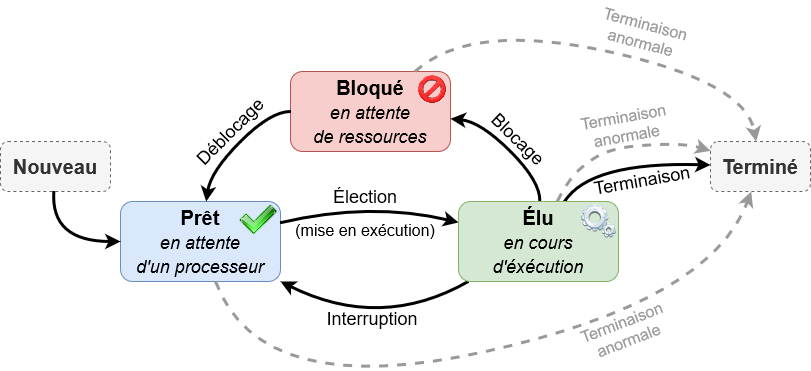

## 5. Ordonnancement des processus

La gestion des états des processus est confiée à un programme du système d’exploitation appelé **ordonnanceur** (*scheduler*). Il est chargé de gérer les accès concurrents aux ressources.

L’utilisation du processeur doit être optimisée : un processus en attente d’une ressource (donnée en mémoire, entrée/sortie, …) doit être mis dans l’état bloqué pour permettre à un autre processus en attente d’un processeur (état prêt) à passer dans l’état élu.

Lorsque plusieurs processus sont en attente (état prêt), l’ordonnanceur doit choisir le processus à élire : il les classe dans une file d’attente.

Dans le cas d’architecture à plusieurs processeurs, un **répartiteur** (*dispatcher*) attribut à chaque processeur un processus élu.

L’ordonnanceur de l’OS sélectionne un processus dans la file d’attente et le laisse s’exécuter pendant un délai maximum déterminé appelé le **quantum de temps**. À la fin de ce temps, ce processus et remis à l’état prêt et un autre est élu.

Une interruption matérielle peut venir écourter le quantum de temps.

Lorsqu’il n’y a plus de processus en attente (état prêt), le processeur redevenant inactif, sa vitesse peut être ralentie afin de diminuer sa consommation énergétique.

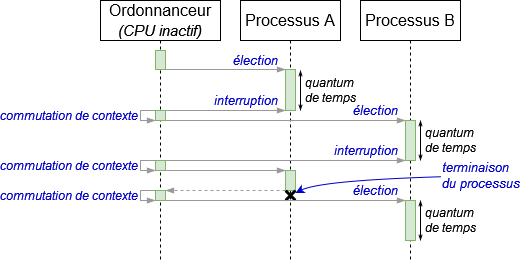

### 5.1 Politiques d’ordonnancement
L’ordonnanceur peut envisager diverses politiques d’ordonnancement :

- Premier arrivé, premier servi : simple, mais peu adapté
- Plus court d’abord : efficace, mais difficile de classer à l’avance la durée d’exécution d’un processus
- Priorité : chaque processus se voit attribué un niveau de priorité
- Tourniquet : chaque processus se voit attribué une durée d’exécution (appelé quantum de temps). Quand un processus a atteint cette durée, il cède la place à un autre.
- politiques hybrides...

En pratique l’ordonnanceur octroie un quantum de temps à tous les processus tout en gérant les priorités.

 
### 5.2 Processus concurrents

Les exécutions des processus sont entrelacées. On parle d'**exécution concurrente** et l’OS est qualifié de **multitâches**.

Lorsqu’un processus est interrompu, son PCB est sauvegardé et quand son exécution reprend, le processus se retrouve dans l’exact état dans lequel il était.

→ Il n’a aucune connaissance de ce qui s’est passé autour de lui pendant ce temps !

Si ce processus ne manipulait que des objets visibles par lui seul (des variables par exemple), il n’y aura aucune conséquente.

En revanche, dans le cas ou ce processus accède à des **ressources partagées** (des fichiers par exemple), il peut y avoir des conséquences non souhaitées.

16. Dans un fichier `progC.py` copier le programme ci-dessous:
```python
from os import getpid
import sys
import time
import random

pid = str(getpid()) # obtention du PID du processus
with open("test.txt", "w", buffering=1) as fichier:
    for i in range(10):
        fichier.write(pid.rjust(5)+" --> "+str(i).ljust(2)+"\n")
        fichier.flush() # vidage du tampon
        time.sleep(random.random()/10)
```
17. L'éxécuter 3 fois de manière concurrente en tapant `python3 progC.py & python3 progC.py & python3 progC.py`. Afficher le fichier de sortie `test.txt` en utilisant la commande `cat test.txt`. Analyser le contenu du fichier.

Votre réponse ici...

## 6. Interblocage

Un **interblocage** (ou étreinte fatale, **deadlock** en anglais) est un phénomène qui se produit lorsque des processus concurrents s’attendent mutuellement. Un processus peut aussi s’attendre lui-même. Les processus bloqués dans cet état le sont définitivement, il s’agit donc d’une situation catastrophique.

### 6.1 Conditions d'interblocage

Une situation de blocage sur une ressource peut survenir si et seulement si toutes les conditions suivantes sont réunies simultanément dans un système :

- Exclusion mutuelle : au moins une ressource du système doit être en accès exclusif. Sinon, les processus ne seraient pas empêchés d’utiliser la ressource si nécessaire. Un seul processus peut utiliser la ressource à un instant donné.
- Rétention et attente (hold and wait ou resource holding) : un processus détient une ressource et demande une ressource supplémentaire détenue par un autre processus.
- Non préemption : une ressource ne peut être libérée que volontairement par le processus qui la détient. Elle ne peut pas être préemptée ou acquise de force par un autre processus
- Attente circulaire : chaque processus doit attendre une ressource qui est détenue par un autre processus, qui à son tour attend que le premier processus libère la ressource. En général, il existe un ensemble de processus en attente, $P = \{ P1 , P2 ,…, PN \}$, tel que P1 attend une ressource détenue par P2 , P2 attend une ressource détenue par P3...

*Ces quatre conditions sont connues sous le nom de « **conditions de Coffman** » d’après leur première description dans un article de 1971 par Edward G. Coffman, Jr.*

### 6.1 Exemple débranché

4 véhicules se présentent en même temps à un carrefour ou la règle de circulation est la priorité à droite. Elles souhaitent toutes aller tout droit.

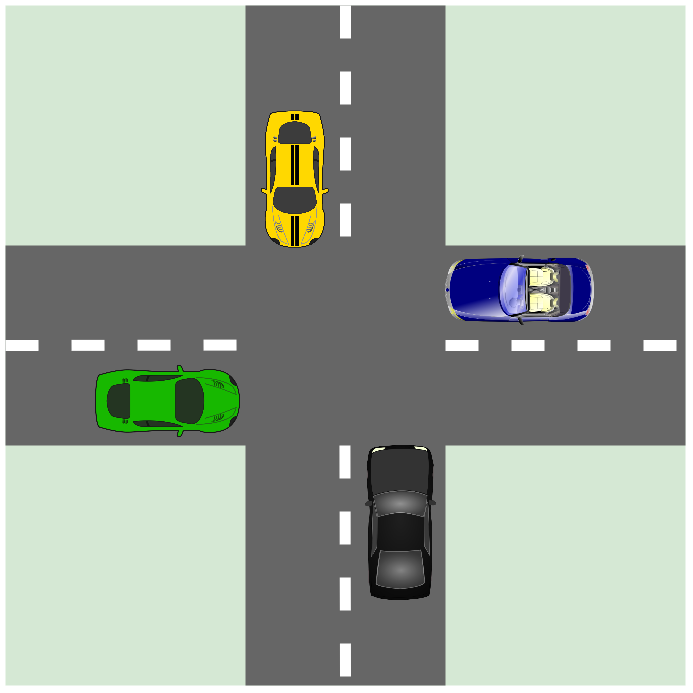

18. Quelle est la ressource que les voitures souhaitent partager ?

Votre réponse ici...

19. Expliquer en quoi les conditions de Coffman sont remplies dans ce cas de figure et rendent ainsi possible l'interblocage.

Votre réponse ici...

20. En pratique, comment cette situation est-elle réglée ? Laquelle des conditions de Coffman est supprimée ?

Votre réponse ici...

### 6.2 Schéma de l'interblocage

les processus seront représentés par des cercles, les ressources par des carrés.
- Si à l'étape A1 le processus A a demandé et reçu la ressource R, la représentation sera :
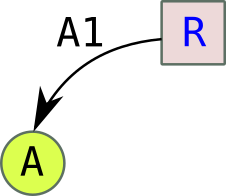
- Si à l'étape A2 le processus A est en attente de la ressource S, la représentation sera :
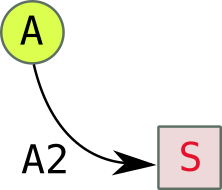

Avec ces conventions, la situation précédente peut donc se schématiser par :

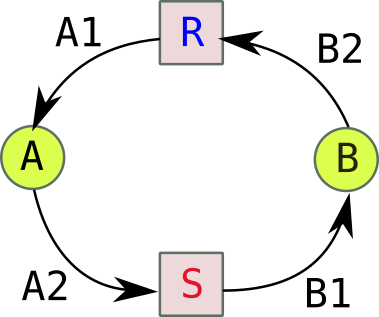

Ce type de schéma fait apparaître un **cycle d'interdépendance**, qui caractérise ici la situation de deadlock.